# **1. Perkenalan Dataset**


# **1. Perkenalan Dataset**
Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari public repositories (*Kaggle*) [Bank Transaction Dataset for Fraud Detection](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/data).
   
2. **Bank Transaction Dataset for Fraud Detection**:

  Tentang Dataset

  Dataset ini memberikan pandangan mendetail tentang perilaku transaksi dan pola aktivitas keuangan, ideal untuk mengeksplorasi deteksi penipuan dan identifikasi anomali. Ini berisi 2.512 sampel data transaksi, mencakup berbagai atribut transaksi, demografi pelanggan, dan pola penggunaan. Setiap entri menawarkan wawasan komprehensif tentang perilaku transaksi, memungkinkan analisis untuk keamanan finansial dan aplikasi deteksi penipuan.

  Fitur Utama:
  - TransactionID: Identifikasi alfanumerik unik untuk setiap transaksi.
  - AccountID: Identifikasi unik untuk setiap akun, dengan beberapa transaksi per akun.
  - TransactionAmount: Nilai moneter dari setiap transaksi, berkisar dari pengeluaran sehari-hari kecil hingga pembelian yang lebih besar.
  - TransactionDate: Stempel waktu dari setiap transaksi, mencatat tanggal dan waktu.
  - TransactionType: Bidang kategorikal yang menunjukkan transaksi 'Kredit' atau 'Debit'.
  - Location: Lokasi geografis transaksi, diwakili oleh nama kota di AS.
  - DeviceID: Identifikasi alfanumerik untuk perangkat yang digunakan untuk melakukan transaksi.
  - IP Address: Alamat IPv4 yang terkait dengan transaksi, dengan perubahan sesekali untuk beberapa akun.
  - MerchantID: Identifikasi unik untuk pedagang, menunjukkan pedagang yang disukai dan penyimpangan untuk setiap akun.
  - AccountBalance: Saldo di akun setelah transaksi, dengan korelasi logis berdasarkan jenis dan jumlah transaksi.
  - PreviousTransactionDate: Stempel waktu dari transaksi terakhir untuk akun, membantu dalam menghitung frekuensi transaksi.
  - Channel: Saluran melalui mana transaksi dilakukan (misalnya, Online, ATM, Cabang).
  - CustomerAge: Usia pemegang akun, dengan pengelompokan logis berdasarkan pekerjaan.
  - CustomerOccupation: Pekerjaan pemegang akun (misalnya, Dokter, Insinyur, Mahasiswa, Pensiunan), mencerminkan pola pendapatan.
  - TransactionDuration: Durasi transaksi dalam detik, bervariasi berdasarkan jenis transaksi.
  - LoginAttempts: Jumlah upaya login sebelum transaksi, dengan nilai yang lebih tinggi menunjukkan potensi anomali.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Library untuk data manipulasi
import pandas as pd
import numpy as np

# Library untuk data visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk preprocessing dan machine learning
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

# Library untuk evaluasi machine learning
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
dataset_df = pd.read_csv("https://raw.githubusercontent.com/ThirafiQaedi/dicoding_BMLP_final/refs/heads/main/Dataset_inisiasi.csv")
#info dataset
print("Informasi Dataset:")
print(dataset_df.info())

print("Dataset data awal:")
dataset_df.head()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Accou

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

##### Memahami Struktur Data

In [3]:
print("Jumlah Baris dan Kolom:")
print(dataset_df.shape)

Jumlah Baris dan Kolom:
(2512, 16)


In [4]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [5]:
dataset_df.describe(include="all")

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002496,AC00460,NaN,2023-04-03 16:07:53,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


In [6]:
#Memperbaiki Tipe Data pada Kolom Date pada data yang masih dalam bentuk tipe object
dataset_df['TransactionDate'] = pd.to_datetime(dataset_df['TransactionDate'])
dataset_df['PreviousTransactionDate'] = pd.to_datetime(dataset_df['PreviousTransactionDate'])
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

In [7]:
#Hasil perbaikan Tipe Data pada Kolom Date
dataset_df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


##### Menangani Data yang Hilang dan duplikat

In [8]:
print("Missing value dalam dataset")
dataset_df.isna().sum()

Missing value dalam dataset


,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [9]:
print("Jumlah duplikasi: ", dataset_df.duplicated().sum())

Jumlah duplikasi:  0


##### Analisis Distribusi dan Korelasi

In [10]:
print("Statistik Deskriptif data:")
print(dataset_df.describe())

Statistik Deskriptif data:
       TransactionAmount                TransactionDate  CustomerAge  \
count        2512.000000                           2512  2512.000000   
mean          297.593778  2023-07-05 20:32:10.826433024    44.673965   
min             0.260000            2023-01-02 16:00:06    18.000000   
25%            81.885000  2023-04-03 16:22:05.750000128    27.000000   
50%           211.140000     2023-07-07 17:49:43.500000    45.000000   
75%           414.527500     2023-10-06 18:40:53.500000    59.000000   
max          1919.110000            2024-01-01 18:21:50    80.000000   
std           291.946243                            NaN    17.792198   

       TransactionDuration  LoginAttempts  AccountBalance  \
count          2512.000000    2512.000000     2512.000000   
mean            119.643312       1.124602     5114.302966   
min              10.000000       1.000000      101.250000   
25%              63.000000       1.000000     1504.370000   
50%             112

In [11]:
dataset_df.describe(include="all")

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,NaN,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,NaN
top,TX002496,AC00460,NaN,NaN,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,NaN
freq,1,12,NaN,NaN,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,NaN
mean,NaN,NaN,297.593778,2023-07-05 20:32:10.826433024,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024
min,NaN,NaN,0.260000,2023-01-02 16:00:06,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,NaN,NaN,81.885000,2023-04-03 16:22:05.750000128,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,2024-11-04 08:07:53
50%,NaN,NaN,211.140000,2023-07-07 17:49:43.500000,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,2024-11-04 08:09:22
75%,NaN,NaN,414.527500,2023-10-06 18:40:53.500000,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872
max,NaN,NaN,1919.110000,2024-01-01 18:21:50,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,NaN,300.000000,5.000000,14977.990000,2024-11-04 08:12:23


In [12]:
# Korelasi antara variable numerik
numerical_dataf = dataset_df.select_dtypes(include=['float64', 'int64'])
numerical_dataf.corr()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
TransactionAmount,1.000000,-0.025616,0.004359,-0.008445,-0.025165
CustomerAge,-0.025616,1.000000,-0.017936,0.007653,0.319942
TransactionDuration,0.004359,-0.017936,1.000000,0.032639,0.005577
LoginAttempts,-0.008445,0.007653,0.032639,1.000000,0.014999
AccountBalance,-0.025165,0.319942,0.005577,0.014999,1.000000


##### Visualisasi Data

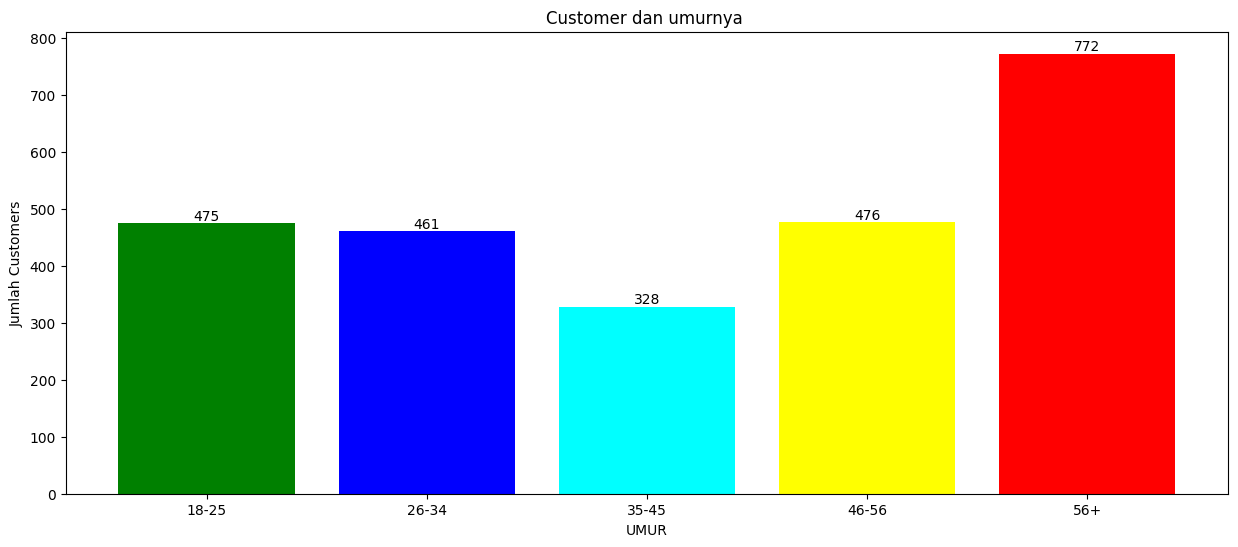

In [13]:
# pengelompokan kategori berdasarkan umur
age18_25 = dataset_df.CustomerAge[(dataset_df.CustomerAge >= 18) & (dataset_df.CustomerAge <= 25)]
age26_34 = dataset_df.CustomerAge[(dataset_df.CustomerAge >= 26) & (dataset_df.CustomerAge <= 34)]
age35_45 = dataset_df.CustomerAge[(dataset_df.CustomerAge >= 35) & (dataset_df.CustomerAge <= 45)]
age46_56 = dataset_df.CustomerAge[(dataset_df.CustomerAge >= 46) & (dataset_df.CustomerAge <= 56)]
age56plus = dataset_df.CustomerAge[dataset_df.CustomerAge > 56]

x = ["18-25", "26-34", "35-45", "46-56", "56+"]
y = [len(age18_25.values), len(age26_34.values), len(age35_45.values), len(age46_56.values), len(age56plus.values)]

plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['green', 'blue', 'cyan', 'yellow','red'])
plt.title("Customer dan umurnya ")
plt.xlabel("UMUR")
plt.ylabel("Jumlah Customers")

for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

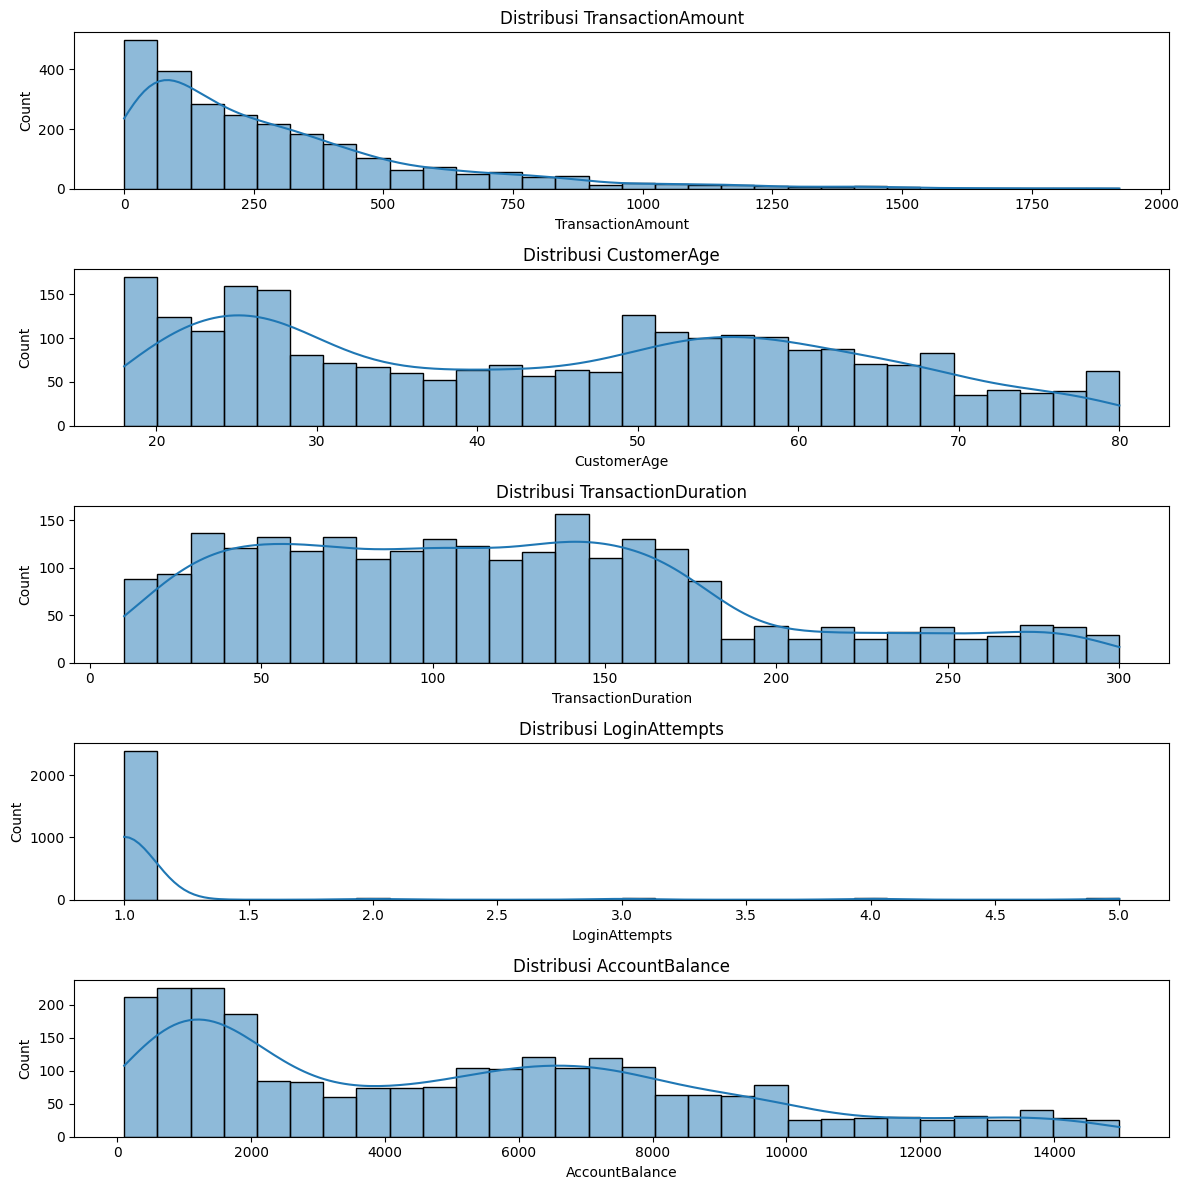

In [14]:
# Visualisasi distribusi variabel numerik

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_dataf):
    sns.histplot(dataset_df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

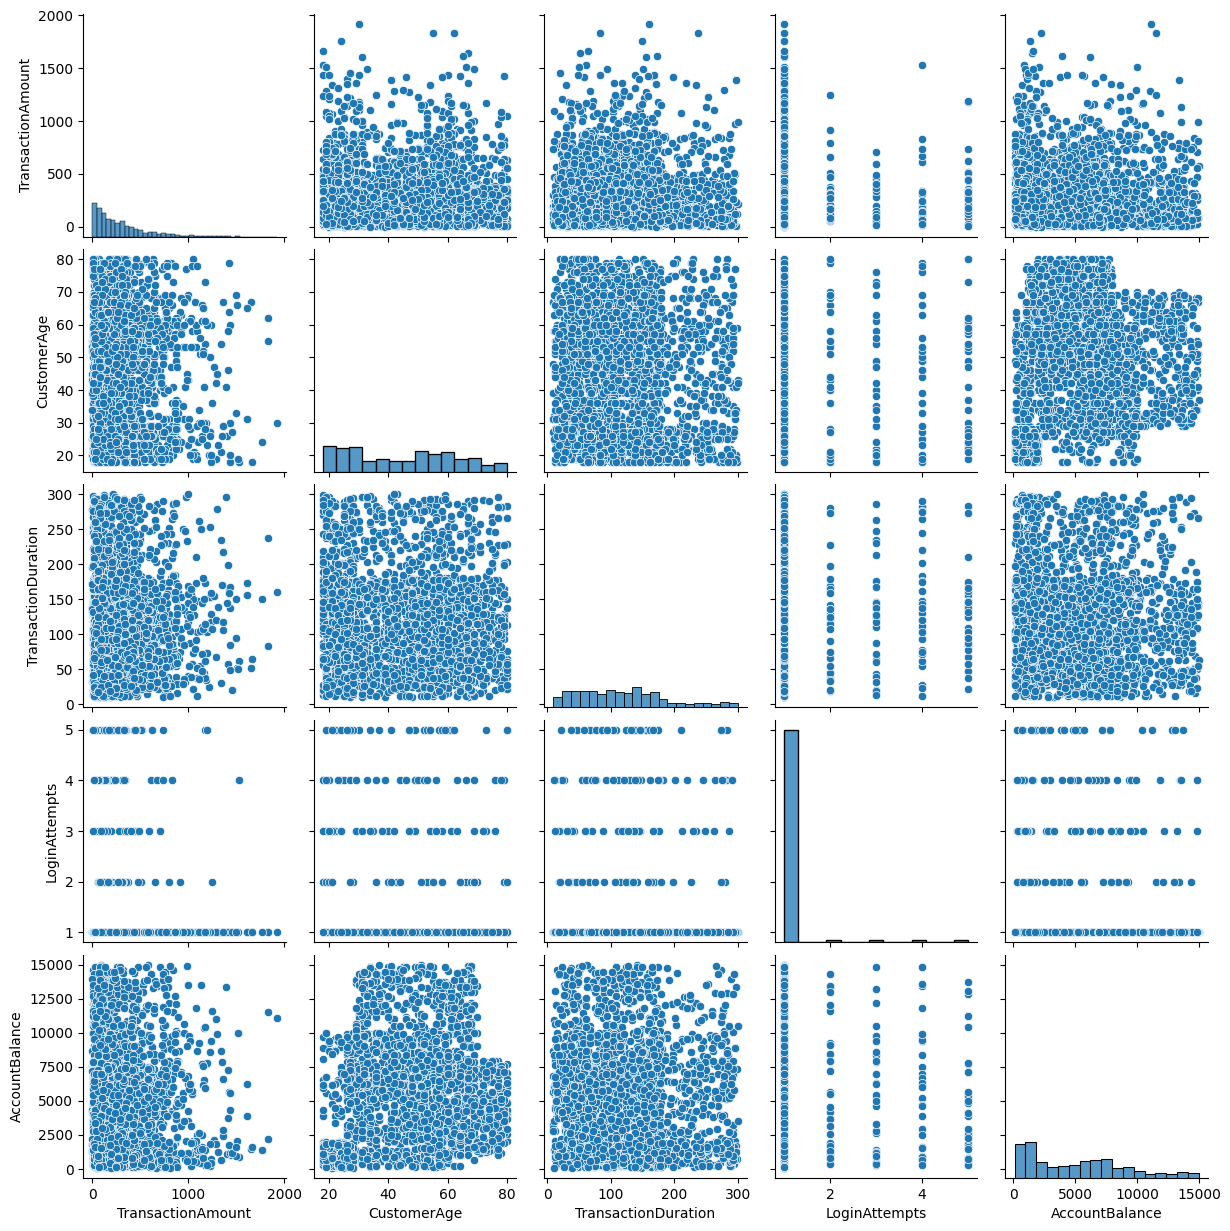

In [15]:
#pairplot untuk data numerik
sns.pairplot(numerical_dataf)
plt.show()

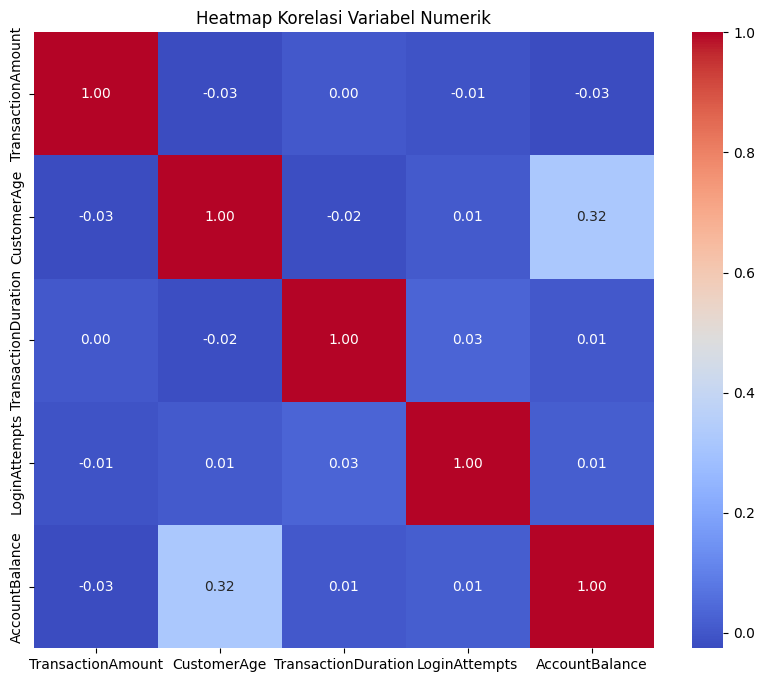

In [16]:
# Matriks korelasi untuk data numerik
matrix_coor = numerical_dataf.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    matrix_coor,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
)
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()

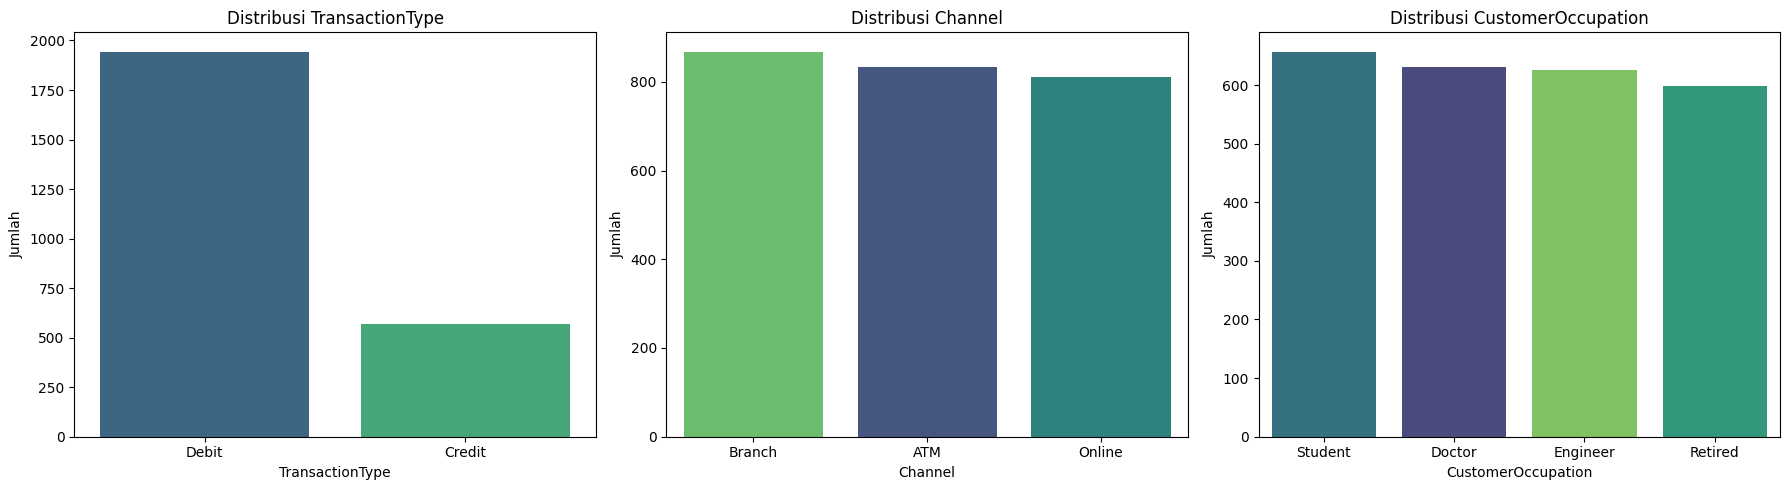

In [17]:
# Visualisasi untuk distribusi variabel kategorikal
categorical_dataf = ['TransactionType', 'Channel', 'CustomerOccupation']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for i, col in enumerate(categorical_dataf):
    sns.countplot(x=dataset_df[col], order=dataset_df[col].value_counts().index,hue=dataset_df[col], palette="viridis", ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Jumlah")

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [18]:
#menyiapkan data untuk Preprocessing
data_f_Preprocess = dataset_df.copy()

In [19]:
data_f_Preprocess.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [20]:
data_f_Preprocess.describe(include="all")

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,NaN,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,NaN
top,TX002496,AC00460,NaN,NaN,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,NaN
freq,1,12,NaN,NaN,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,NaN
mean,NaN,NaN,297.593778,2023-07-05 20:32:10.826433024,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024
min,NaN,NaN,0.260000,2023-01-02 16:00:06,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,NaN,NaN,81.885000,2023-04-03 16:22:05.750000128,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,2024-11-04 08:07:53
50%,NaN,NaN,211.140000,2023-07-07 17:49:43.500000,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,2024-11-04 08:09:22
75%,NaN,NaN,414.527500,2023-10-06 18:40:53.500000,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872
max,NaN,NaN,1919.110000,2024-01-01 18:21:50,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,NaN,300.000000,5.000000,14977.990000,2024-11-04 08:12:23


In [21]:
#check duplikat
duplikat = data_f_Preprocess.duplicated().sum()
print(f"Number of duplicate rows: {duplikat}")

Number of duplicate rows: 0


In [22]:
#check missing value
missing_values = data_f_Preprocess.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [23]:
numeric_features = data_f_Preprocess.select_dtypes(include=['float64', 'int64']).columns

#####Normalisasi atau Standarisasi Fitur

Sebelum Standarisasi:


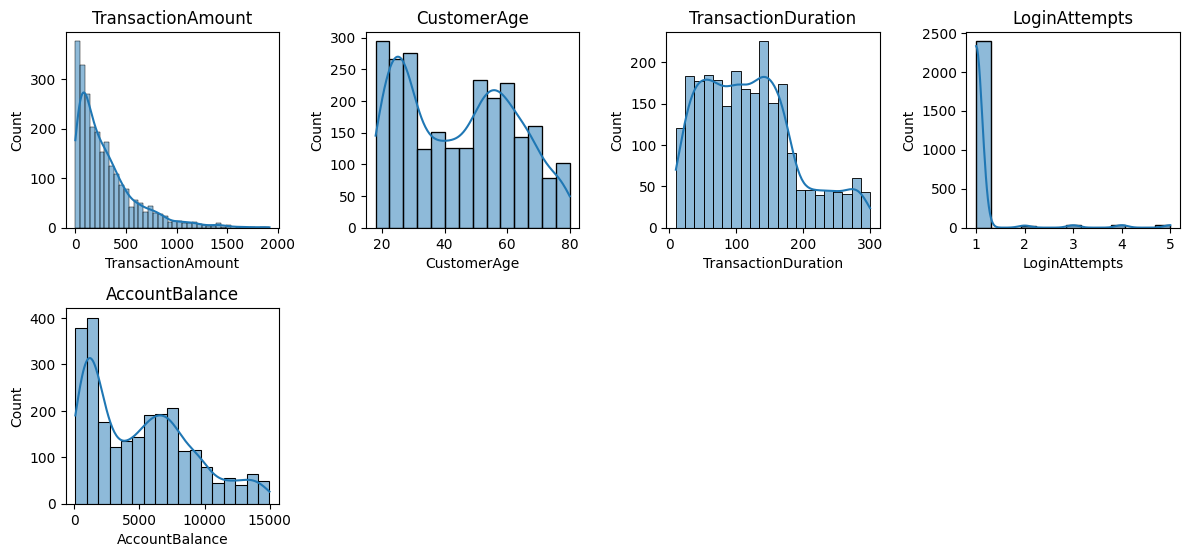

In [24]:
print("Sebelum Standarisasi:")
plt.figure(figsize=(12, 8))
for i, col in enumerate(data_f_Preprocess[numeric_features].columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(data_f_Preprocess[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [25]:
print("Sebelum Standarisasi:")
print(data_f_Preprocess[numeric_features].describe())

Sebelum Standarisasi:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000  


In [26]:
skalar = StandardScaler()
data_f_Preprocess[numeric_features] = skalar.fit_transform(data_f_Preprocess[numeric_features])

Setelah Standarisasi:


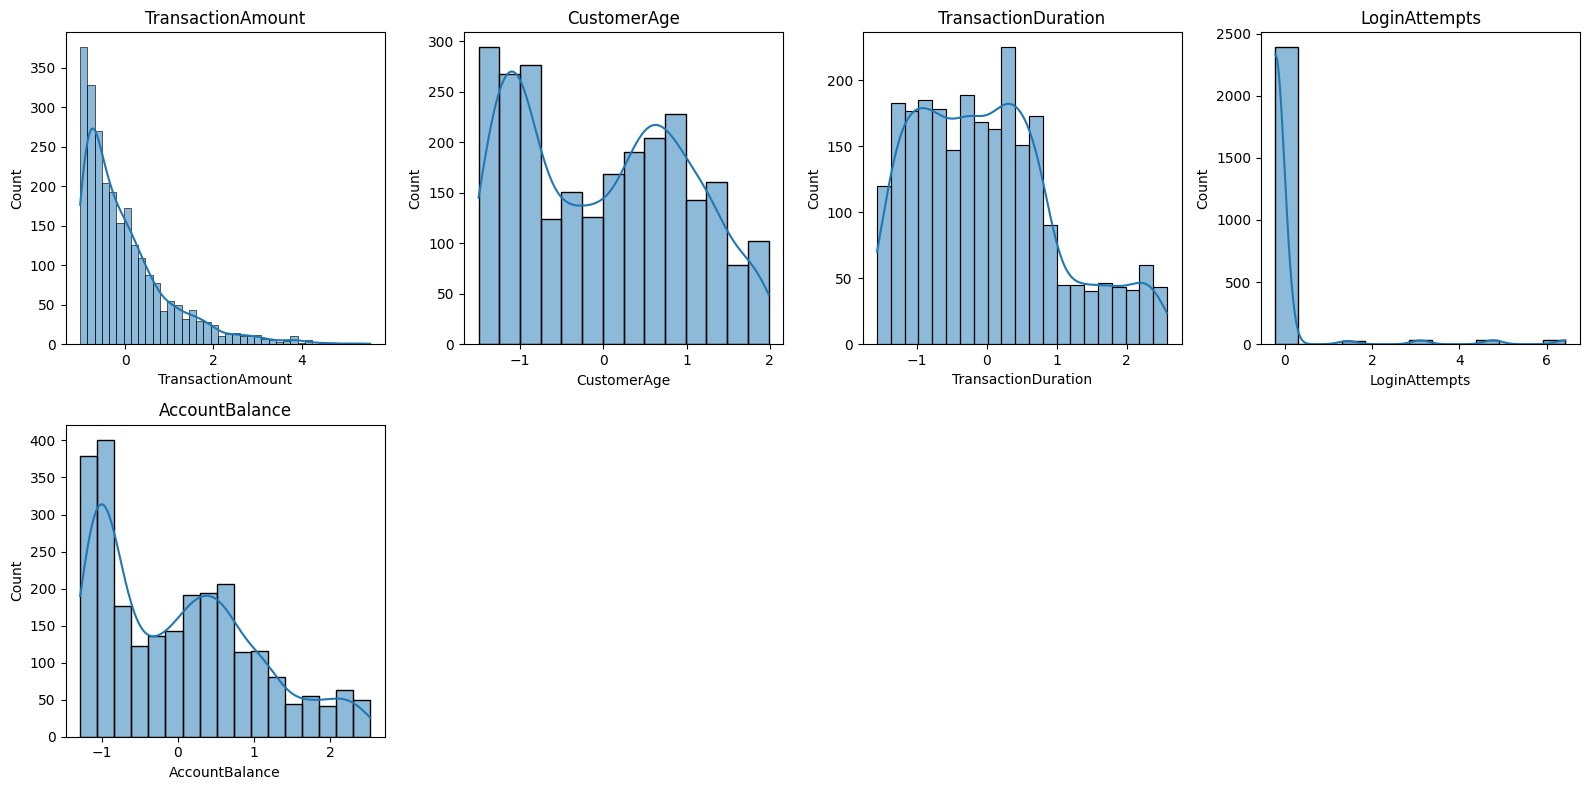

In [27]:
print("Setelah Standarisasi:")
n_cols = len(numeric_features)
n_rows = (n_cols // 4) + (1 if n_cols % 4 != 0 else 0)

plt.figure(figsize=(16, 4 * n_rows))
for i, col in enumerate(numeric_features):
    plt.subplot(n_rows, 4, i+1)
    sns.histplot(data_f_Preprocess[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [28]:
print("Setelah Standarisasi:")
print(data_f_Preprocess[numeric_features].describe())

Setelah Standarisasi:
       TransactionAmount   CustomerAge  TransactionDuration  LoginAttempts  \
count       2.512000e+03  2.512000e+03         2.512000e+03   2.512000e+03   
mean       -1.414297e-16  9.900078e-18         7.637203e-17   1.527441e-16   
std         1.000199e+00  1.000199e+00         1.000199e+00   1.000199e+00   
min        -1.018657e+00 -1.499493e+00        -1.567456e+00  -2.067936e-01   
25%        -7.390118e-01 -9.935526e-01        -8.097706e-01  -2.067936e-01   
50%        -2.961881e-01  1.832826e-02        -1.021205e-01  -2.067936e-01   
75%         4.006114e-01  8.053467e-01         5.912336e-01  -2.067936e-01   
max         5.555266e+00  1.985874e+00         2.578372e+00   6.431745e+00   

       AccountBalance  
count    2.512000e+03  
mean     4.985396e-17  
std      1.000199e+00  
min     -1.285344e+00  
25%     -9.255845e-01  
50%     -9.712227e-02  
75%      6.575405e-01  
max      2.529043e+00  


##### Deteksi dan Penanganan Outlier

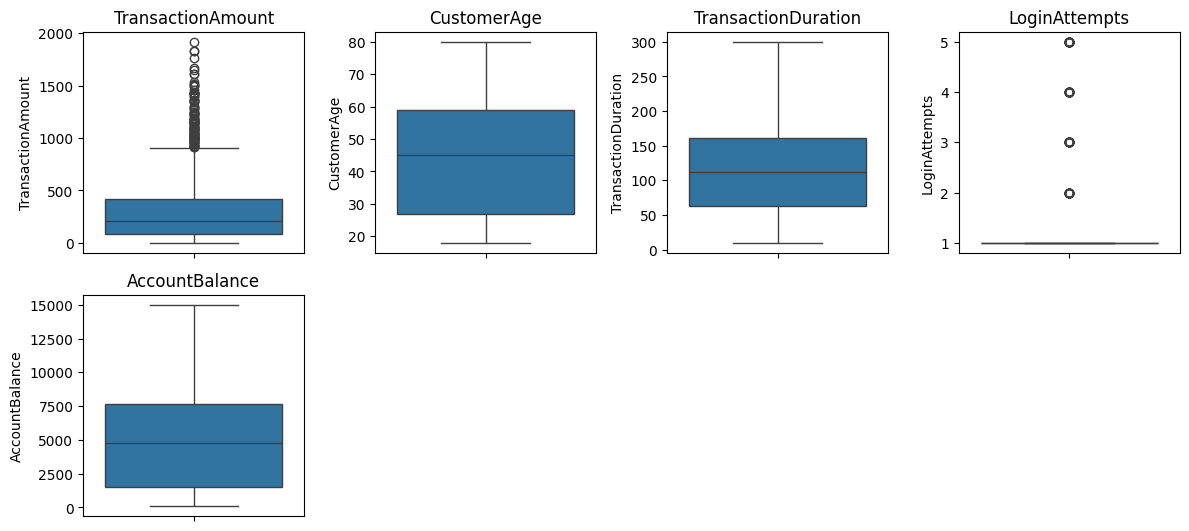

In [29]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(data_f_Preprocess[numeric_features]):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=dataset_df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Terdapat outlier yang teridentifikasi pada box plot untuk TransactionAmount dan LoginAttempts. Pada LoginAttempts, beberapa outlier ditandai dengan titik-titik yang menunjukkan nilai antara 2 hingga 5. Untuk TransactionAmount, outlier ditentukan dalam rentang 900 hingga 1800, sementara sebagian besar transaksi berada di bawah 500. Hal ini mengindikasikan adanya lebih dari satu percobaan login. Outlier di TransactionAmount sangat mencolok, menunjukkan transaksi dengan nilai yang jauh lebih tinggi dibandingkan transaksi biasa. Sementara itu, outlier di LoginAttempts menunjukkan situasi di mana pengguna harus mencoba lebih dari sekali untuk login. Oleh karena dari hasil diatas, saya memutuskan untuk tidak menghapus atau mengganti outlier tersebut, karena bisa memberikan insight mengenai anomali.

##### Encoding Data Kategorikal

In [30]:
category_features = ['TransactionType','Channel','CustomerOccupation']
data_f_Preprocess[category_features]

,TransactionType,Channel,CustomerOccupation
0,Debit,ATM,Doctor
1,Debit,ATM,Doctor
2,Debit,Online,Student
3,Debit,Online,Student
4,Credit,Online,Student
...,...,...,...
2507,Credit,Branch,Doctor
2508,Debit,Branch,Doctor
2509,Debit,Branch,Retired
2510,Debit,Online,Student


Ekstrak Fitur dari TransactionDate dan PreviousTransactionDate

In [31]:
# Ekstrak fitur baru dari tanggal
data_f_Preprocess['DayOfWeek'] = data_f_Preprocess['TransactionDate'].dt.dayofweek
data_f_Preprocess['Hour'] = data_f_Preprocess['TransactionDate'].dt.hour
data_f_Preprocess['Month'] = data_f_Preprocess['TransactionDate'].dt.month
data_f_Preprocess['DaysSinceLastTransaction'] = (data_f_Preprocess['TransactionDate'] - data_f_Preprocess['PreviousTransactionDate']).dt.days

# Hapus kolom tanggal asli
data_f_Preprocess.drop(['TransactionDate', 'PreviousTransactionDate'], axis=1, inplace=True)

One Hot Encoding Data Kategorikal

In [32]:
data_f_Preprocess['TransactionType'].unique()

array(['Debit', 'Credit'], dtype=object)

In [33]:
data_f_Preprocess['Channel'].unique()

array(['ATM', 'Online', 'Branch'], dtype=object)

In [34]:
data_f_Preprocess['CustomerOccupation'].unique()

array(['Doctor', 'Student', 'Retired', 'Engineer'], dtype=object)

In [35]:
onehot_col = ['TransactionType', 'Channel', 'CustomerOccupation']
data_f_Preprocess = pd.get_dummies(data_f_Preprocess, columns=onehot_col, drop_first=True)

#### **Data terkini setelah Data Preprocessing**

In [36]:
data_f_Preprocess.head()

,TransactionID,AccountID,TransactionAmount,Location,DeviceID,IP Address,MerchantID,CustomerAge,TransactionDuration,LoginAttempts,...,DayOfWeek,Hour,Month,DaysSinceLastTransaction,TransactionType_Debit,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,TX000001,AC00128,-0.971275,San Diego,D000380,162.198.218.92,M015,1.423718,-0.552443,-0.206794,...,1,16,4,-573,True,False,False,False,False,False
1,TX000002,AC00455,0.269440,Houston,D000051,13.149.61.4,M052,1.311287,0.305314,-0.206794,...,1,16,6,-496,True,False,False,False,False,False
2,TX000003,AC00019,-0.586882,Mesa,D000235,215.97.143.157,M009,-1.443277,-0.909842,-0.206794,...,0,18,7,-483,True,False,True,False,False,True
3,TX000004,AC00070,-0.387456,Raleigh,D000187,200.13.225.150,M002,-1.049768,-1.353017,-0.206794,...,4,16,5,-549,True,False,True,False,False,True
4,TX000005,AC00411,-0.973468,Atlanta,D000308,65.164.3.100,M091,-1.049768,1.120184,-0.206794,...,0,17,10,-385,False,False,True,False,False,True


In [37]:
data_f_Preprocess.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,DayOfWeek,Hour,Month,DaysSinceLastTransaction
count,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2.512000e+03,2512.000000,2512.000000,2512.00000,2512.000000
mean,-1.414297e-16,9.900078e-18,7.637203e-17,1.527441e-16,4.985396e-17,1.448248,16.626194,6.56250,-487.857882
std,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.511310,0.731059,3.47559,106.378910
min,-1.018657e+00,-1.499493e+00,-1.567456e+00,-2.067936e-01,-1.285344e+00,0.000000,16.000000,1.00000,-672.000000
25%,-7.390118e-01,-9.935526e-01,-8.097706e-01,-2.067936e-01,-9.255845e-01,0.000000,16.000000,3.00000,-581.000000
50%,-2.961881e-01,1.832826e-02,-1.021205e-01,-2.067936e-01,-9.712227e-02,1.000000,16.000000,7.00000,-486.000000
75%,4.006114e-01,8.053467e-01,5.912336e-01,-2.067936e-01,6.575405e-01,3.000000,17.000000,10.00000,-395.000000
max,5.555266e+00,1.985874e+00,2.578372e+00,6.431745e+00,2.529043e+00,4.000000,18.000000,12.00000,-308.000000


In [38]:
#check missing value
missing_values = data_f_Preprocess.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
TransactionID                  0
AccountID                      0
TransactionAmount              0
Location                       0
DeviceID                       0
IP Address                     0
MerchantID                     0
CustomerAge                    0
TransactionDuration            0
LoginAttempts                  0
AccountBalance                 0
DayOfWeek                      0
Hour                           0
Month                          0
DaysSinceLastTransaction       0
TransactionType_Debit          0
Channel_Branch                 0
Channel_Online                 0
CustomerOccupation_Engineer    0
CustomerOccupation_Retired     0
CustomerOccupation_Student     0
dtype: int64


In [39]:
#check duplikat
duplikat = data_f_Preprocess.duplicated().sum()
print(f"Number of duplicate rows: {duplikat}")

Number of duplicate rows: 0


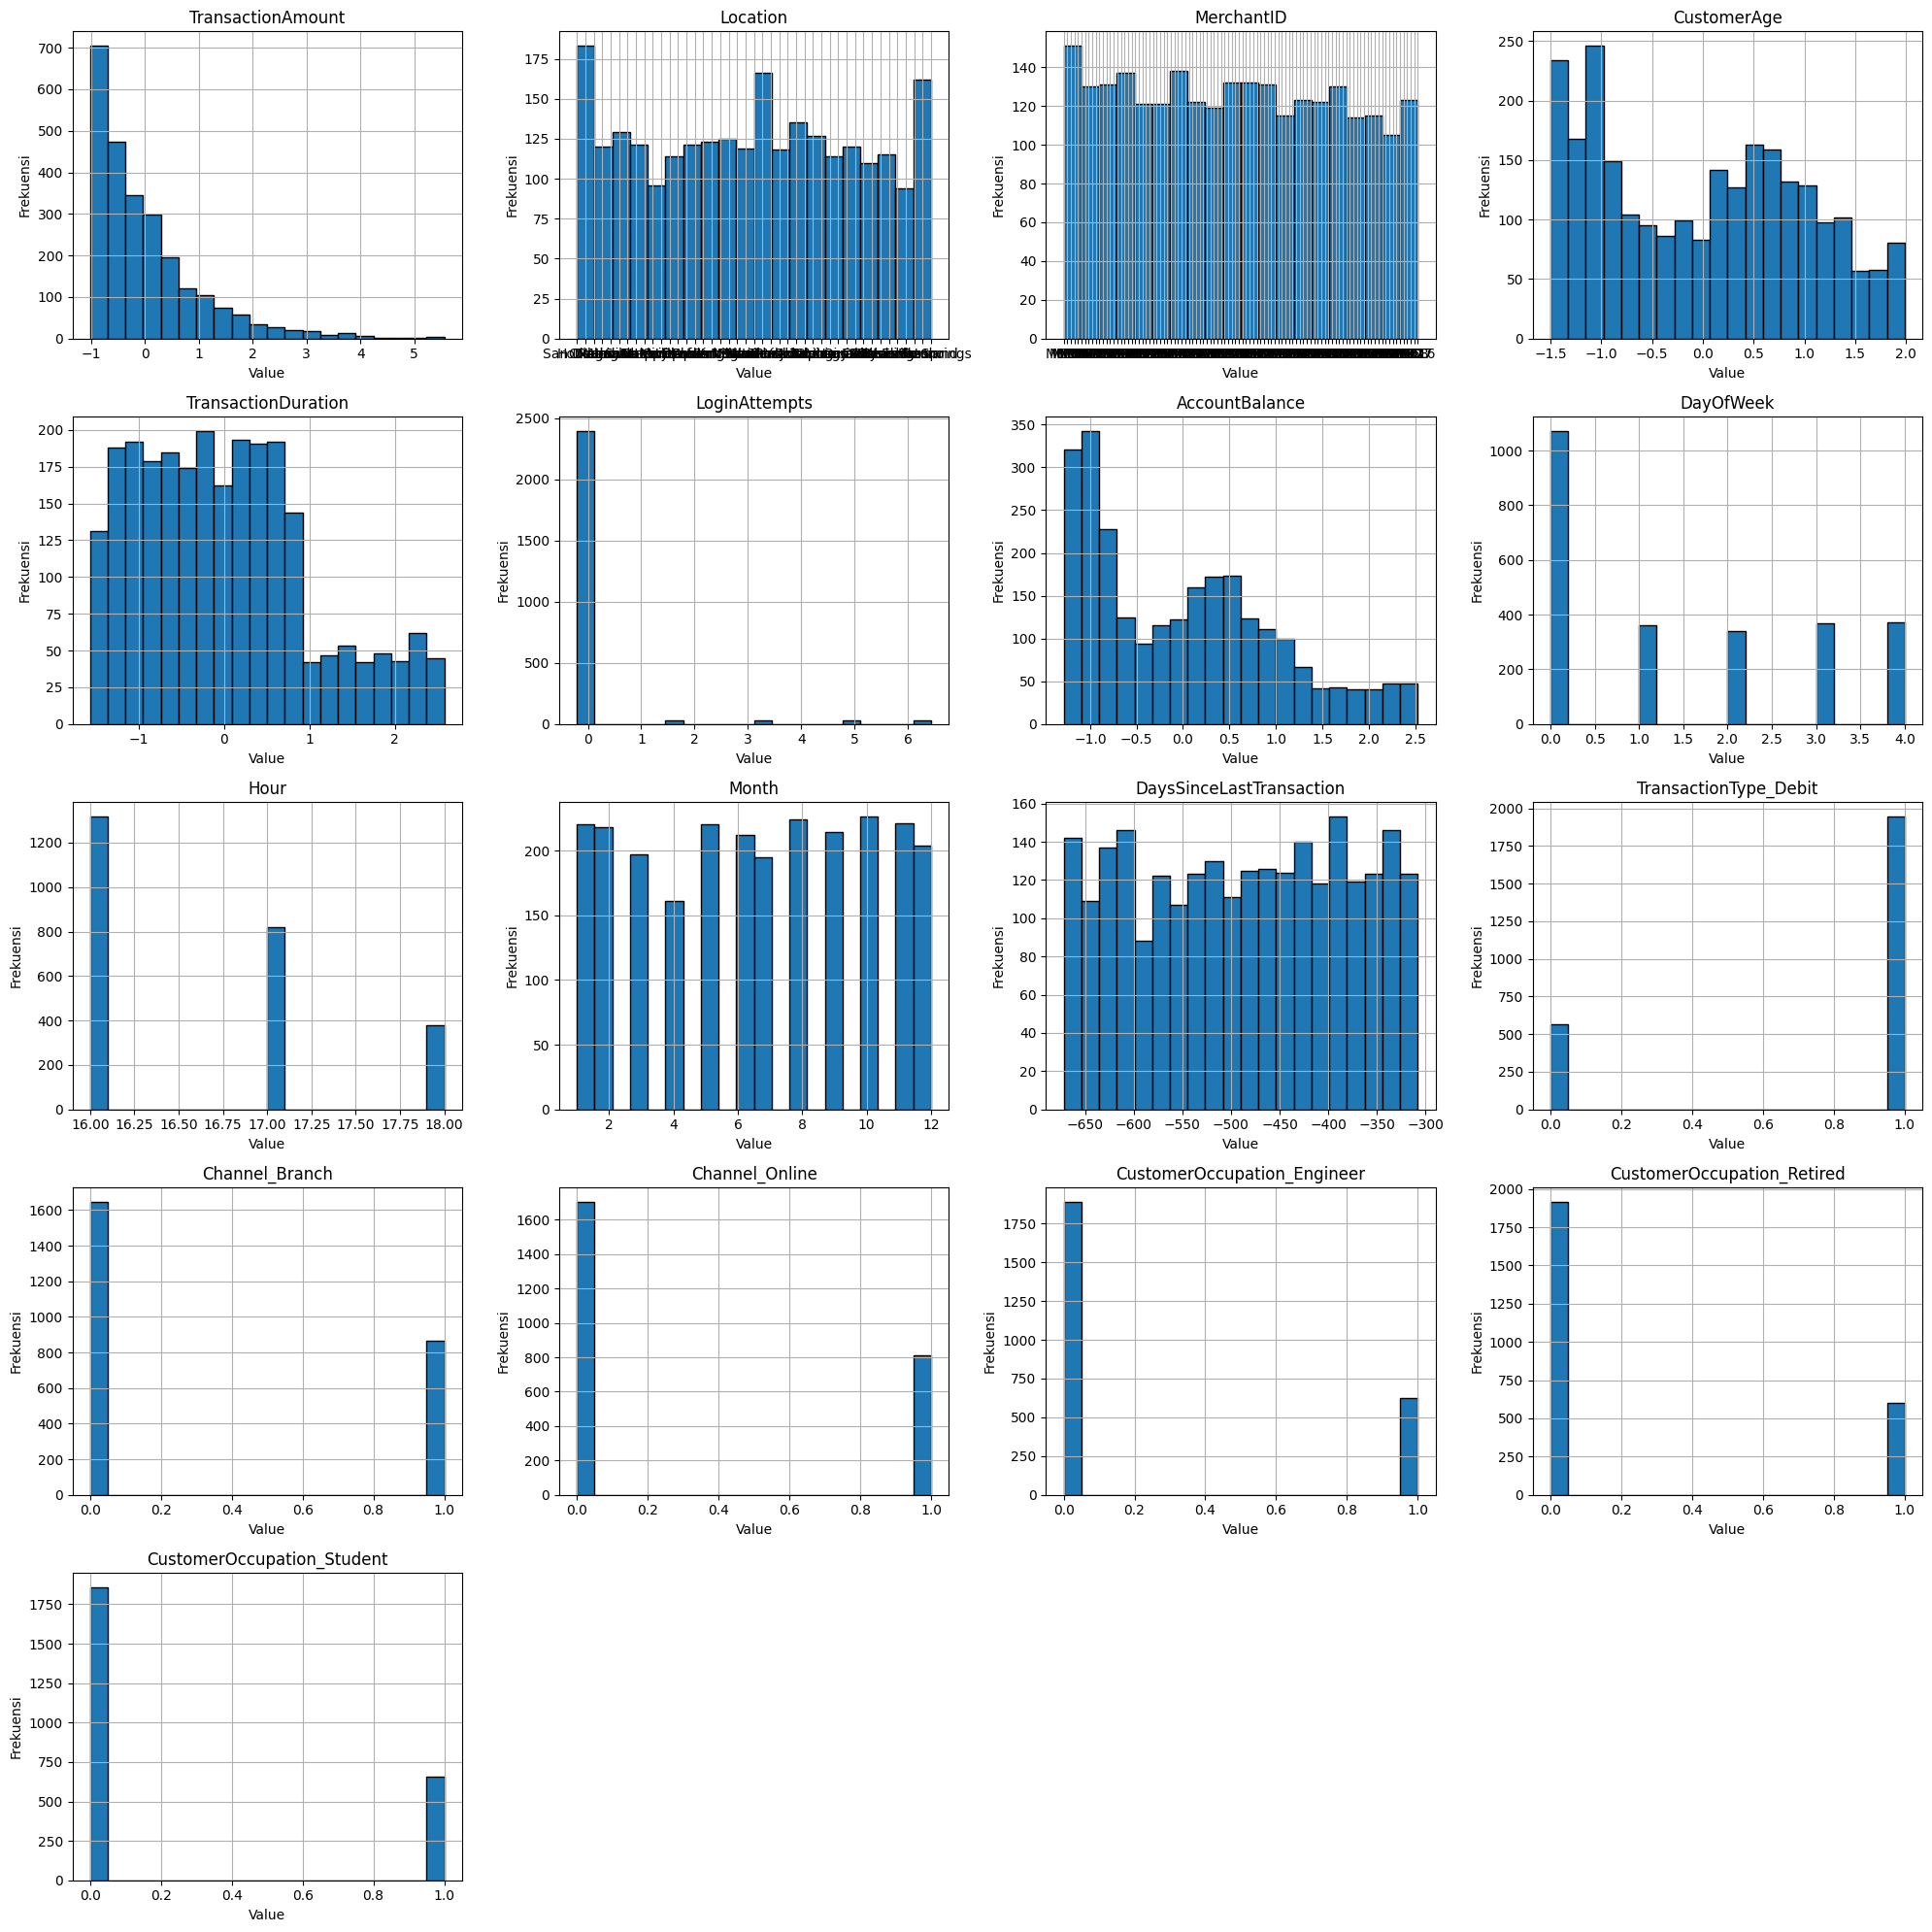

In [40]:
# Memuat semua data Histogram
df_Histogram_temp = data_f_Preprocess.copy()
df_Histogram_temp.drop('TransactionID', axis=1, inplace=True)
df_Histogram_temp.drop('AccountID', axis=1, inplace=True)
df_Histogram_temp.drop('DeviceID', axis=1, inplace=True)
df_Histogram_temp.drop('IP Address', axis=1, inplace=True)

for col in df_Histogram_temp.columns:
    if df_Histogram_temp[col].dtype == bool:
        df_Histogram_temp[col] = df_Histogram_temp[col].astype(int)

num_vars = df_Histogram_temp.shape[1]

n_cols = 4
n_rows = -(-num_vars // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, column in enumerate(df_Histogram_temp.columns):
    df_Histogram_temp[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frekuensi')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

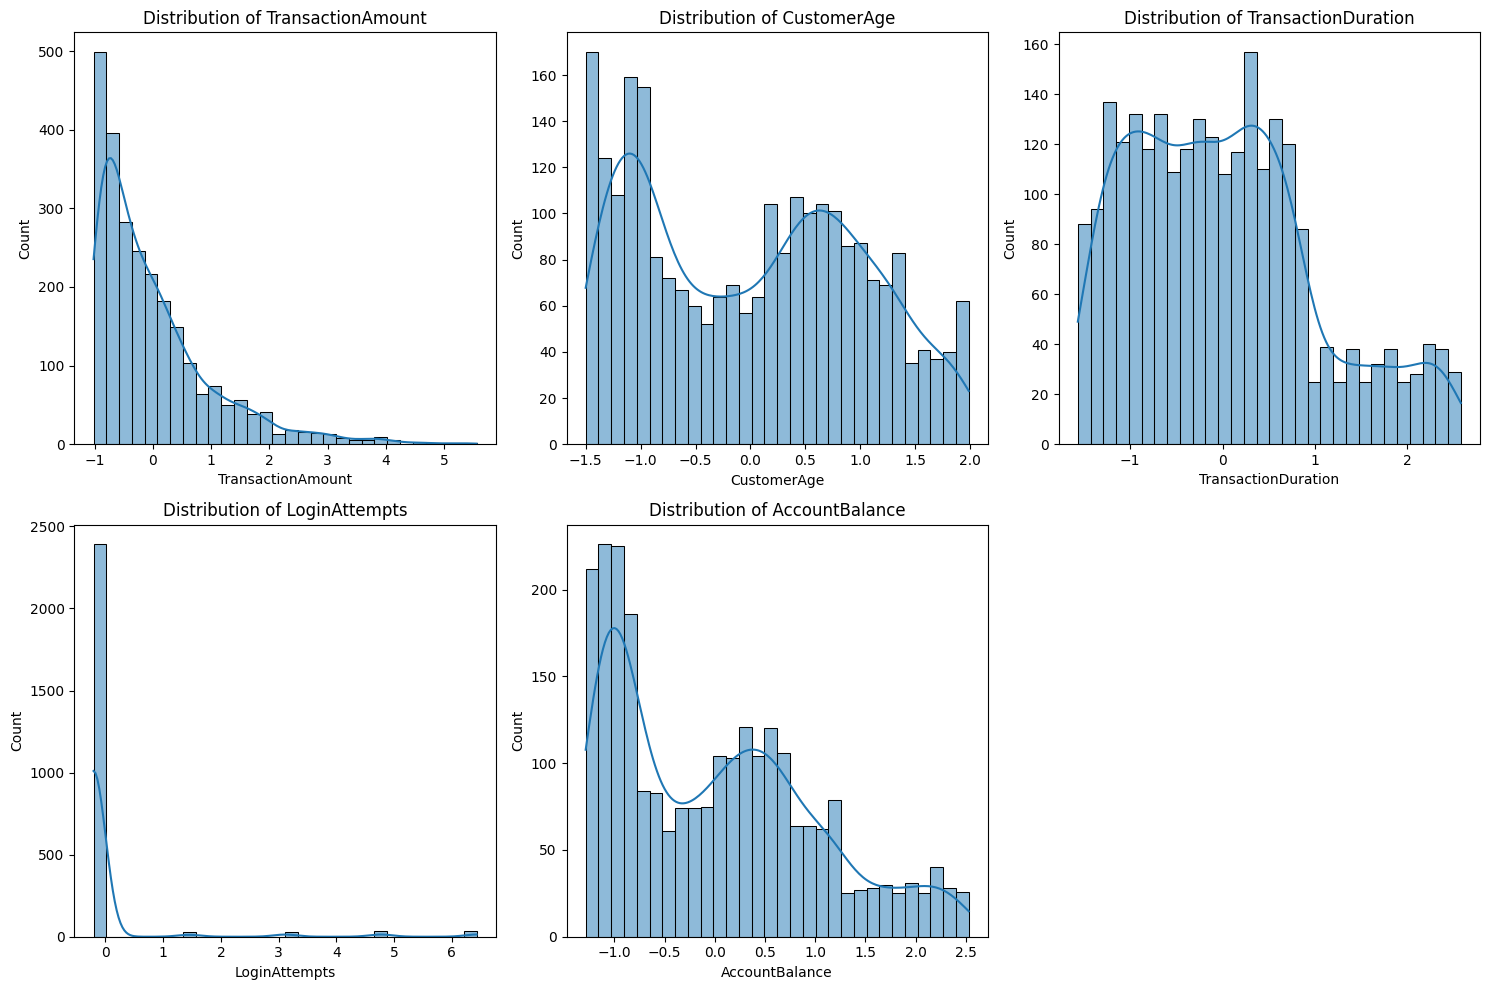

In [41]:
#histogram data numerik
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data_f_Preprocess[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [42]:
(data_f_Preprocess.select_dtypes(include=['float64', 'int64']).columns)

Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'DaysSinceLastTransaction'],
      dtype='object')

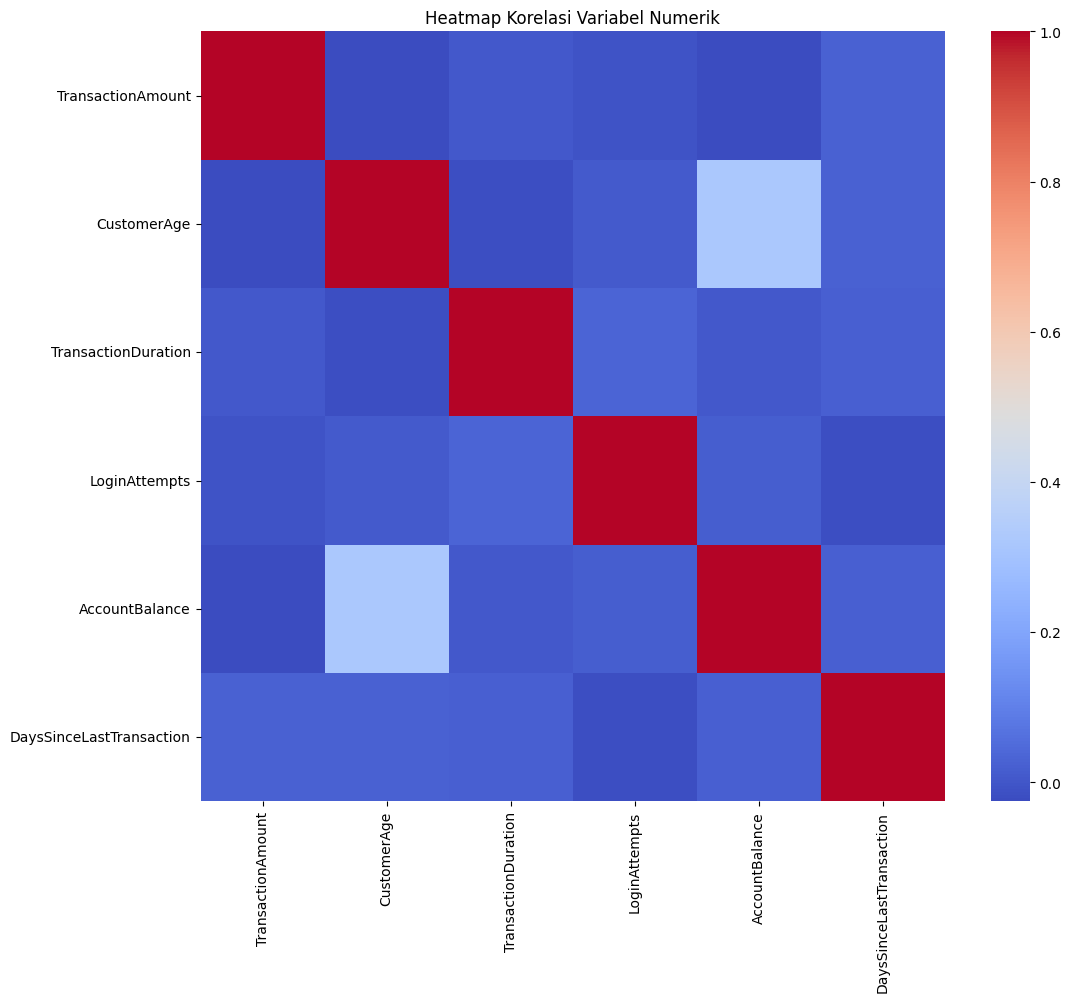

In [43]:
pross_numeric = data_f_Preprocess[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance','DaysSinceLastTransaction']]
plt.figure(figsize=(12, 10))
sns.heatmap(
    pross_numeric.corr(),
    annot= False ,
    cmap='coolwarm',
    fmt=".2f",
)
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

#### **Pilih algoritma**

Karena dataset tersebut memiliki outlier pada kolom TransactionAmount dan LoginAttempts, serta tujuan saya memilih untuk tidak menghapus outlier terssebut adalah mendeteksi anomali, maka algoritma clustering yang cocok adalah DBSCAN (Density-Based Spatial Clustering of Applications with Noise).

##### **Persiapan Data fitur yang digunakan**

In [44]:
# Memilih fitur yang relevan untuk clustering
featuresCl = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionType_Debit']

# Standarisasi fitur
skalar = StandardScaler()
X_scaled = skalar.fit_transform(data_f_Preprocess[featuresCl])

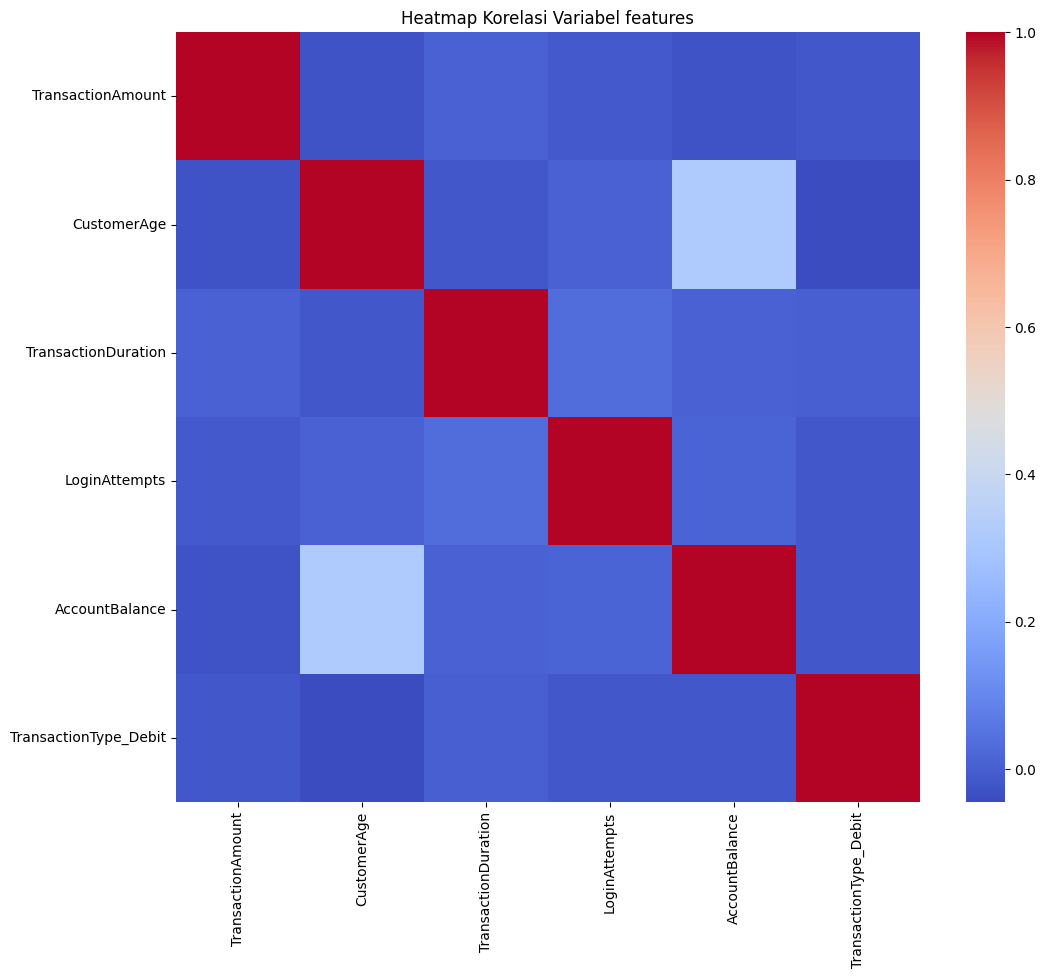

In [45]:
#korelasi fitur yang di pilih
heat_features = data_f_Preprocess[featuresCl]
plt.figure(figsize=(12, 10))
sns.heatmap(
    heat_features.corr(),
    annot= False ,
    cmap='coolwarm',
    fmt=".2f",
)
plt.title("Heatmap Korelasi Variabel features")
plt.show()

##### **Menyiapkan Parameter untuk menentukan nilai eps dan min_samples**

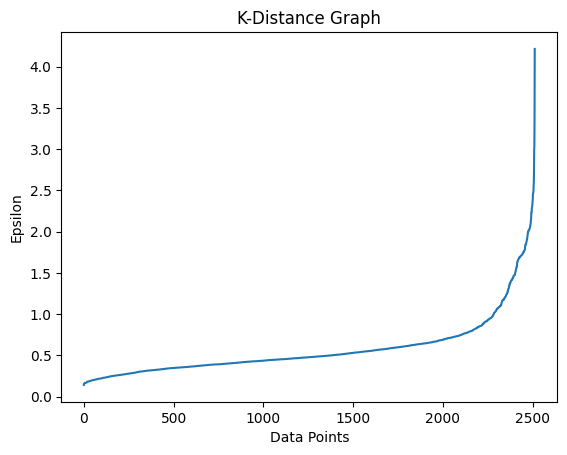

In [46]:
# Hitung k-distance graph untuk menentukan eps
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# diagram untuk plot k-distance graph untuk titik siku/Elblow
distances = np.sort(distances[:, 4], axis=0)
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Data Points')
plt.ylabel('Epsilon')
plt.show()

**Berdasarkan grafik K-Distance tersebut, saya mengusulkan parameter untuk DBSCAN sebagai berikut:**

---




Nilai eps: Grafik K-Distance menunjukkan adanya "siku" atau titik belok/Elblow point yang paling jelas di sekitar nilai 0.7-0.9. Ini adalah area di mana kurva mulai meningkat secara signifikan setelah sebelumnya relatif stabil. Oleh karena itu, saya akan menetapkan nilai eps = 0.8.

Nilai min_samples: Untuk menentukan nilai min_samples, prinsip umumnya adalah sebagai berikut:

- Dataset kecil: min_samples = 3-5
- Dataset sedang: min_samples = 5-10
- Dataset besar: min_samples = 10-20

Mengingat bahwa dataset ini memiliki sekitar 2500 data points, yang tergolong sebagai dataset ukuran sedang hingga besar, saya akan menggunakan min_samples = 10.

##### **Buat Model Algoritma clustering DBSCAN dan Latih Model Clustering**

In [47]:
# Buat model DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=10)

In [48]:
# Latih model
dbscan.fit(X_scaled)

DBSCAN(eps=0.8, min_samples=10)

In [49]:
# Tambahkan label cluster ke DataFrame
data_f_Preprocess['Cluster'] = dbscan.labels_

In [50]:
#data_f_Preprocess['Cluster'].unique()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [51]:
# mengitung Silhouette Score untuk evaluasi
Clusters_valid_ = data_f_Preprocess[data_f_Preprocess['Cluster'] != -1]
silhouette_average = silhouette_score(X_scaled[Clusters_valid_.index], Clusters_valid_['Cluster'])
print(f"Silhouette Score: {silhouette_average}")

Silhouette Score: 0.2926085241957185


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [52]:
# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
X_scaled_pca = pca.fit_transform(X_scaled)

# melatih model DBSCAN dengan data yang sudah direduksi
dbscan_pca = DBSCAN(eps=0.5, min_samples=5)
dbscan_pca.fit(X_scaled_pca)

# Tambahkan label cluster PCA ke DataFrame data_f_Preprocess
data_f_Preprocess['Cluster_PCA'] = dbscan_pca.labels_

In [53]:
# Evaluasi model clustering setelah Feature Selection
silhouette_average_pca = silhouette_score(X_scaled_pca, data_f_Preprocess['Cluster_PCA'])
print(f"Silhouette Score setelah PCA: {silhouette_average_pca}")

Silhouette Score setelah PCA: 0.5289318666937046


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

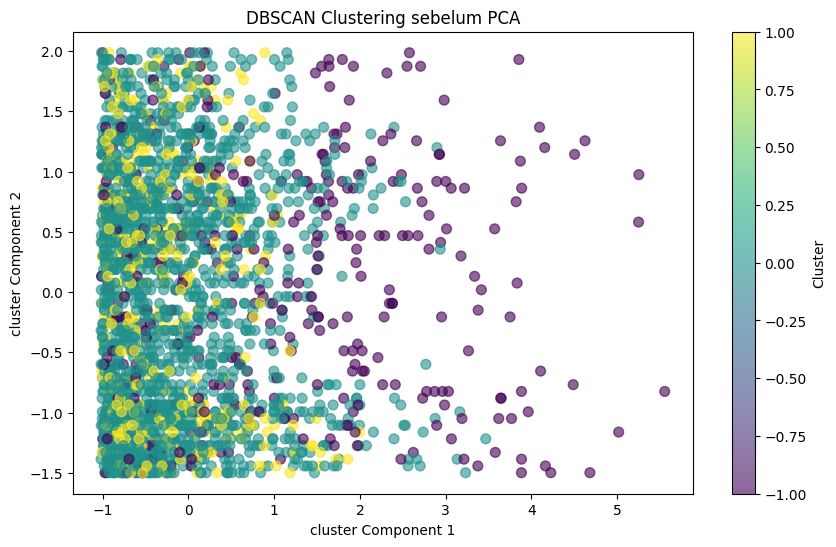

In [54]:
# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data_f_Preprocess['Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.title('DBSCAN Clustering sebelum PCA')
plt.xlabel('cluster Component 1')
plt.ylabel('cluster Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()


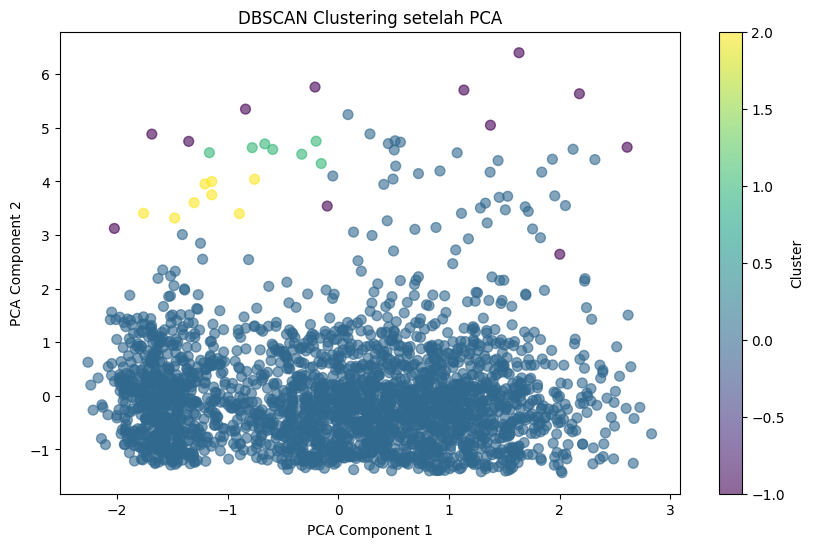

In [55]:
# Visualisasi hasil clustering setelah feature selection PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled_pca[:, 0], X_scaled_pca[:, 1], c=data_f_Preprocess['Cluster_PCA'], cmap='viridis', s=50, alpha=0.6)
plt.title('DBSCAN Clustering setelah PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [56]:
# Menyimpan DataFrame clueter sebelum melakukan inverse transform
df__clusters = data_f_Preprocess.copy()
df__clusters['Cluster'] = dbscan.labels_
# df__clusters['Cluster'].unique()

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [57]:
# Melakukan inverse transform pada data yang telah distandarisasi
feature_inverse = skalar.inverse_transform(X_scaled)
df_features_inverse = pd.DataFrame(feature_inverse, columns=featuresCl, index=data_f_Preprocess.index)

# Menggabungkan hasil cluster dengan data asli
dataset_df_ori_clusters = pd.concat([df_features_inverse, df__clusters[['Cluster']]], axis=1)

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [58]:
#untuk memperapih cluster di tambah 1 agar cluster -1 tidak ada
dataset_df_ori_clusters['Cluster'] +=1

# Membuat analisis statistik deskriptif untuk setiap cluster
cluster_statistik = dataset_df_ori_clusters.groupby('Cluster').agg({
    'TransactionAmount': ['mean', 'median', 'std', 'min', 'max'],
    'CustomerAge': ['mean', 'median', 'std', 'min', 'max'],
    'TransactionDuration': ['mean', 'median', 'std', 'min', 'max'],
    'LoginAttempts': ['mean', 'median', 'std', 'min', 'max'],
    'AccountBalance': ['mean', 'median', 'std', 'min', 'max'],
    'TransactionType_Debit': ['mean', 'sum']
})

In [59]:
# Menampilkan statistik untuk setiap cluster
print(cluster_statistik)

        TransactionAmount                                         CustomerAge  \
                     mean    median       std       min       max        mean   
Cluster                                                                         
0                1.028093  0.737376  1.547949 -1.012935  5.555266    0.084225   
1               -0.150389 -0.368545  0.775745 -1.018657  3.467754   -0.026303   
2               -0.265144 -0.387422  0.614550 -1.012593  1.992737    0.038594   

                                                 ... LoginAttempts            \
           median       std       min       max  ...           std       min   
Cluster                                          ...                           
0        0.074544  0.986273 -1.499493  1.985874  ...      2.282215 -0.206794   
1       -0.037887  1.000456 -1.499493  1.985874  ...      0.000000 -0.206794   
2        0.186975  1.008417 -1.499493  1.985874  ...      0.000000 -0.206794   

                  AccountBalance

In [60]:
# Menghitung jumlah data pada setiap cluster
cluster_counts = dataset_df_ori_clusters['Cluster'].value_counts()
print("Jumlah data pada setiap cluster:")
print(cluster_counts)

Jumlah data pada setiap cluster:
Cluster
1    1747
2     405
0     360
Name: count, dtype: int64


In [61]:
# Menggabungkan label cluster dengan data asli
dataset_df['Cluster'] = data_f_Preprocess['Cluster']

In [62]:
#untuk memperapih cluster di tambah 1 agar cluster -1 tidak ada
dataset_df['Cluster'] = dataset_df['Cluster'] + 1
data_f_Preprocess['Cluster'] = data_f_Preprocess['Cluster'] + 1
data_f_Preprocess['Cluster_PCA'] = data_f_Preprocess['Cluster_PCA'] + 1

In [63]:
# Membuat analisis statistik deskriptif untuk setiap cluster menggunakan data asli
cluster_statistic = dataset_df.groupby('Cluster').agg({
    'TransactionAmount': ['mean', 'min', 'max', 'std'],
    'CustomerAge': ['mean', 'min', 'max'],
    'LoginAttempts': ['mean', 'max'],
    'AccountBalance': ['mean', 'min', 'max'],
    'TransactionType': lambda x: x.mode()[0]  # statistik untuk modus kategorikal tipe transaksi
})

print(cluster_statistic)

        TransactionAmount                            CustomerAge          \
                     mean   min      max         std        mean min max   
Cluster                                                                    
0              597.681944  1.93  1919.11  451.827951   46.172222  18  80   
1              253.696932  0.26  1309.79  226.430845   44.206068  18  80   
2              220.201309  2.03   879.25  179.379753   45.360494  18  80   

        LoginAttempts     AccountBalance                   TransactionType  
                 mean max           mean     min       max        <lambda>  
Cluster                                                                     
0            1.869444   5    6601.001389  207.10  14977.99           Debit  
1            1.000000   1    4925.062381  101.25  14942.78           Debit  
2            1.000000   1    4609.097704  105.01  14847.97          Credit  


### 📌 **Interpretasi Hasil Clustering dari Model DBSCAN**
####1. Cluster 0:
- **TransactionAmount**  : Rata-rata 597.681944(min 1.93, max 1919.11)(dollar)
- **CustomerAge**: Rata-rata 46 tahun (min 18, max 80)
- **LoginAttempts**: Rata-rata 1-2 kali login (maksimum 5)
- **AccountBalance**: Rata-rata 6601 (min 207.10, max 14977.99)(dollar)
- **TransactionType**: Debit
- **Analisis**: Cluster ini menunjukkan anomali atau noise dengan nilai transaksi yang tinggi dan bervariasi. Saldo akun tertinggi di antara semua cluster. Memiliki Pola login yang tidak biasa dengan jumlah percobaan login lebih dari 1 kali, yang diasumsikan menunjukkan kemungkinan perilaku tidak biasa dan bisa saja mencurigakan sehingga keamanan yang perlu ditingkatkan dengan melakukan pemantauan keamanan tambahan serta pemantauan transaksi bernilai tinggi, perlu dilakukannya evaluasi untuk mencegah potensi fraud.

####2. Cluster 1:
- **TransactionAmount**  : Rata-rata 253.696932 (min 0.26, max 1309.79)(dollar)
- **CustomerAge**: Rata-rata 44 tahun (min 18, max 80)
- **LoginAttempts**: Rata-rata 1 kali login (maksimum 1)
- **AccountBalance**: Rata-rata 4925.06 (min 101.25, max 14942.78)(dollar)
- **TransactionType**: Debit
- **Analisis**: Cluster ini menunjukkan segmen pelanggan dengan transaksi debit nilai menengah dan rentang usia yang luas yang di dominasi dari anak muda sampai paruh baya . Perilaku login normal dan saldo akun cukup aman, rata-rata, dan substansial.

####3. Cluster 2:
- **TransactionAmount**  : Rata-rata 220.201309 (min 2.03, max 879.28)(dollar)
- **CustomerAge**: Rata-rata 45 tahun (min 18, max 80)
- **LoginAttempts**: Rata-rata 1 kali login (maksimum 1)
- **AccountBalance**: Rata-rata 4609.09 (min 105.01, max 14847.97)(dollar)
- **TransactionType**: Credit
- **Analisis**: Cluster ini menunjukkan segmen Pelanggan rentang usia yang luas yang di dominasi paruhbaya dan lebih tua yang melakukan transaksi kredit dengan nilai rata-rata lebih rendah. Memiliki saldo akun yang cukup tinggi, menunjukkan kemungkinan kelompok nasabah mapan yang lebih memilih untuk transaksi kredit.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [64]:
data_f_Preprocess.to_csv('Dataset_clustering.csv', index=False)